# HoughLine

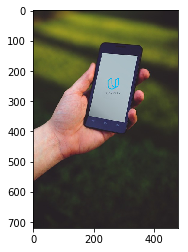

In [8]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image = cv2.imread('images/phone.jpg')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

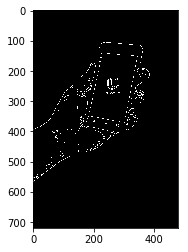

In [10]:
# Converting into grayscale image

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#Parameters for Canny

low_threshold = 50
high_threshold = 100

edges = cv2.Canny(gray,low_threshold,high_threshold)

plt.imshow(edges,cmap='gray')

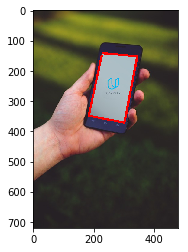

In [17]:
# Hough Transform Params
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 100
max_line_gap = 5

copy_image = np.copy(image)

lines = cv2.HoughLinesP(edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap) # Run Hough transform

# Draw lines on copied image
for line in lines : 
    for x1,y1,x2,y2 in line:
        cv2.line(copy_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(copy_image)


# Hough Circle

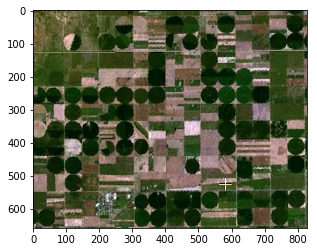

In [18]:
farm_image = cv2.imread('images/round_farms.jpg')
farm_image = cv2.cvtColor(farm_image, cv2.COLOR_BGR2RGB)
plt.imshow(farm_image)

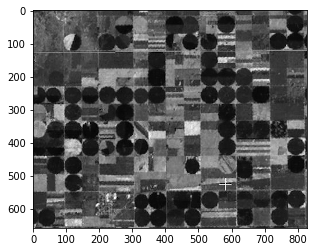

In [19]:
gray_farm = cv2.cvtColor(farm_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_farm, cmap = 'gray')

Circles shape:  (1, 162, 3)


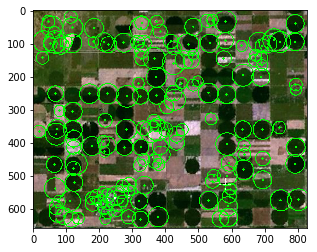

In [33]:
circles_im = np.copy(farm_image)

circles = cv2.HoughCircles(gray_farm,cv2.HOUGH_GRADIENT, # detection method
                           1, # resolution factor between detection and image 
                           minDist = 15, # min dist. between circles
                           param1=70, # upper value for canny edge detection
                           param2=20, # threshold value for circle detection, smaller value leads to higher number of circles
                           minRadius=15, # min and max radii for circle detection
                           maxRadius=35)      

circles = np.uint16(np.around((circles)))

for i in circles[0,:]:
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(circles_im,(i[0],i[1]),2,(0,255,0),3)
    
plt.imshow(circles_im)
print('Circles shape: ',circles.shape)
    